In [132]:
import dicom as dcm
import SimpleITK as sitk
import numpy as np 
import array
from numpy import unravel_index
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact


from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice])#, cmap=plt.cm.gray
    interact(plot_image, myslice=(0, im.shape[0]))
    return;

In [225]:
energy='9'
heter='lung'
study='emstd'

im=sitk.ReadImage('/media/sf_CRCT/JupyterNotebook/data/image/'+energy+'e/physics/'+heter+'/'+energy+'e'+heter+'_'+study+'.mhd')
im_uncertainty=sitk.ReadImage('/media/sf_CRCT/JupyterNotebook/data/image/'+energy+'e/physics/'+heter+'/'+energy+'e'+heter+'_'+study+'_uncertainty.mhd')

pix=sitk.GetArrayFromImage(im)
pix_uncertainty=sitk.GetArrayFromImage(im_uncertainty)

print('origin: ', im.GetOrigin())
print('spacing: ',im.GetSpacing())
print('size: ', im.GetSize())

ct_viewer(pix)
ct_viewer(pix_uncertainty)

origin:  (-99.0, 50.5, -99.0)
spacing:  (2.0, 1.0, 2.0)
size:  (100, 100, 100)


interactive(children=(IntSlider(value=50, description=u'myslice'), Output()), _dom_classes=('widget-interact',))

interactive(children=(IntSlider(value=50, description=u'myslice'), Output()), _dom_classes=('widget-interact',))

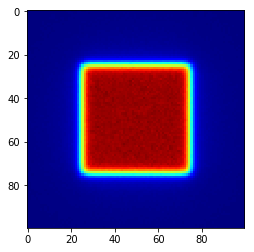

In [226]:
depth=15

depthim=int(((im.GetSize()[1]-1)-round(depth/im.GetSpacing()[1])))

myslice=pix[:, depthim, :]
myslice_uncertainty=pix_uncertainty[:, depthim, :]

plt.imshow(myslice, cmap=plt.cm.jet)

#plt.imshow(myslice_uncertainty, cmap=plt.cm.jet)
#print 

#[z, y, x]
pdd=pix[im.GetSize()[0]/2, :, im.GetSize()[1]/2]
pdd_uncertainty=pix_uncertainty[im_uncertainty.GetSize()[0]/2, :, im_uncertainty.GetSize()[1]/2]
pdd=np.flipud(pdd)
pdd_uncertainty=np.flipud(pdd_uncertainty)

x=np.arange(0,pdd.shape[0])
x=x*1.0
#x=x-(x.max()/2)

pdd=pdd/pdd.max()
#pdd_uncertainty=pdd_uncertainty/pdd_uncertainty.max()

trace1=np.column_stack((x,pdd))
trace2=np.column_stack((x,pdd_uncertainty))

In [227]:
c1= Scatter(x = x,
               y = pdd,
               name='pdd',
               mode = 'lines+markers')
c2= Scatter(x = x,
               y = pdd_uncertainty,
               name='pdd_uncertainty',
               mode = 'lines+markers')
fig = dict(data=[c1, c2])
iplot(fig)

In [228]:
np.savetxt('/media/sf_CRCT/JupyterNotebook/data/plot/physics/'+energy+'e/'+energy+'e'+heter+'_'+study+'.mhd', trace1, delimiter=',', header='pas,value', comments='')
np.savetxt('/media/sf_CRCT/JupyterNotebook/data/plot/physics/'+energy+'e/'+energy+'e'+heter+'_'+study+'_uncertainty.mhd', trace2, delimiter=',', header='pas,value', comments='')